In [1]:
pip install mesa

     |████████████████████████████████| 655kB 1.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 81kB 11.9MB/s eta 0:00:01
     |████████████████████████████████| 51kB 8.7MB/s  eta 0:00:01
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5487 sha256=749c012d75f0b8fc7ac8e8b9974431cd3fbd53c51154d3c424968d37c4f7ddfd
  Stored in directory: /home/ben/.cache/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built python-slugify
  Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

In [8]:
!cd covid19-sim-mesa/

In [9]:
!pwd

/home/ben


In [1]:
%matplotlib inline
# from https://github.com/ziofil/live_plot
from collections import defaultdict
from matplotlib import pyplot as plt
from IPython.display import clear_output

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label, data in data_dict.items():
        plt.plot(np.array(data) * 25.733, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('iteration')
    plt.legend(loc='best')  # upper left
    plt.show()


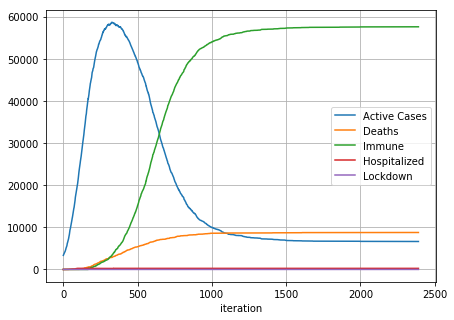

Total deaths: 8774.953


In [4]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 200 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)

#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

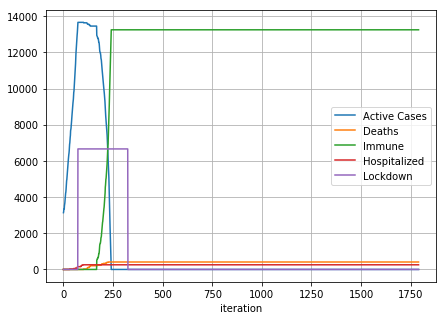

Total deaths: 411.728


In [8]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if infected[-1] / population_size > 0.2:
        return 21 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

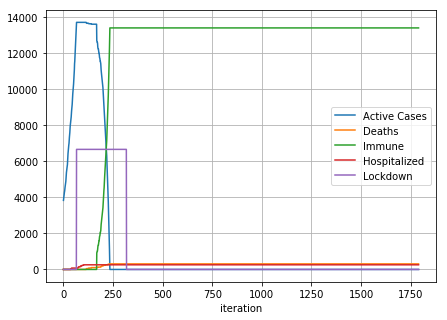

Total deaths: 308.796


In [9]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (infected[-1] / population_size) > 0.2:
        return 21 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

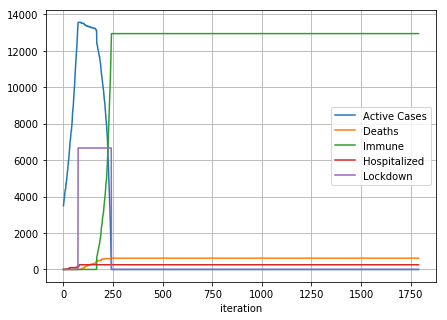

Total deaths: 617.592


In [10]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (max(infected[-20:]) / population_size) > 0.2:
        return 14 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

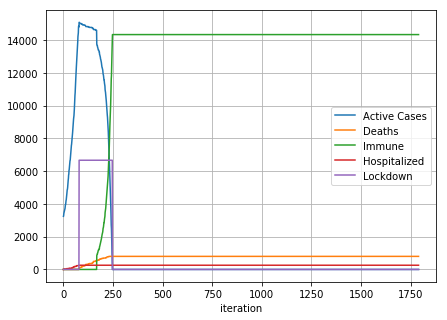

Total deaths: 797.7230000000001


In [11]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (
        (max(infected[-21 * 12:]) / population_size) > 0.2
        and deaths[-1] > deaths[-2]
    ):
        return 14 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

In [ ]:
def debug():
    print(model.datacollector.model_vars['Active Cases'][-10:])
    print(model.datacollector.model_vars['Immune'][-10:])
    print(model.datacollector.model_vars['Deaths'][-10:])
    print(model.datacollector.model_vars['Hospitalized'][-10:])
    print(model.datacollector.model_vars['Lockdown'][-10:])

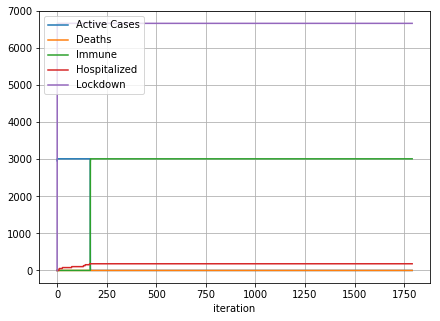

Total deaths: 0.0


In [12]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    return 999999

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

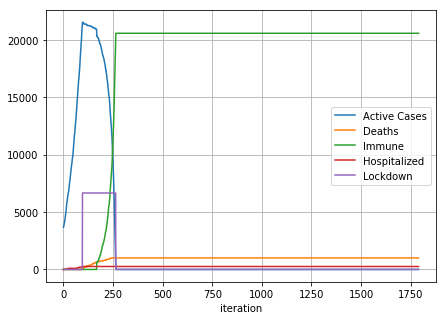

Total deaths: 1003.587


In [13]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (
        (max(infected[-21 * 12:]) / population_size) > 0.01
        and len(deaths) > 2
        and deaths[-1] > deaths[-2]
    ):
        return 14 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}
model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

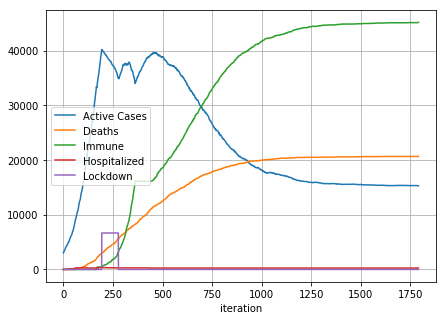

Total deaths: 20663.599000000002


In [19]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (
        (max(infected[-5 * 10:]) / population_size) > 0.6
        and 
        (
            len(deaths) > 2
            and deaths[-1] > deaths[-2]
        )
    ):
        return 7 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    #"mortality_rate": 0.005,  # mortality rate among those infected
    "critical_rate": 0.15,  # critical illness rate among those infected
    "hospital_capacity_rate": .02, # hospital beds per person
    # https://www.hsj.co.uk/acute-care/nhs-hospitals-have-four-times-more-empty-beds-than-normal/7027392.article
    # https://www.kingsfund.org.uk/publications/nhs-hospital-bed-numbers
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}  # end of parameters

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

In [ ]:
* https://teck78.blogspot.com/2020/04/using-mesa-framework-to-simulate-spread.html
* https://mesa.readthedocs.io/en/master/index.html
* https://github.com/benman1/covid19-sim-mesa